In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("./dataset/River/River_Arno.csv")
data.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [21]:
# 计算每个特征的缺失值比例
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage.sort_values(ascending=False)

Rainfall_Consuma             84.386029
Rainfall_Stia                84.386029
Rainfall_S_Savino            84.386029
Rainfall_Laterina            84.386029
Rainfall_Camaldoli           84.386029
Rainfall_Montevarchi         79.956188
Rainfall_Bibbiena            71.059998
Rainfall_Vernio              47.876354
Rainfall_Incisa              44.407935
Rainfall_Cavallina           26.664233
Rainfall_S_Agata             26.664233
Rainfall_Mangona             26.664233
Rainfall_S_Piero             26.664233
Rainfall_Le_Croci            26.664233
Temperature_Firenze          24.644031
Hydrometry_Nave_di_Rosano     0.584155
Date                          0.000000
dtype: float64

Date                            0
Rainfall_Le_Croci            2191
Rainfall_Cavallina           2191
Rainfall_S_Agata             2191
Rainfall_Mangona             2191
Rainfall_S_Piero             2191
Rainfall_Vernio              3934
Rainfall_Stia                6934
Rainfall_Consuma             6934
Rainfall_Incisa              3649
Rainfall_Montevarchi         6570
Rainfall_S_Savino            6934
Rainfall_Laterina            6934
Rainfall_Bibbiena            5839
Rainfall_Camaldoli           6934
Temperature_Firenze          2025
Hydrometry_Nave_di_Rosano      48
dtype: int64


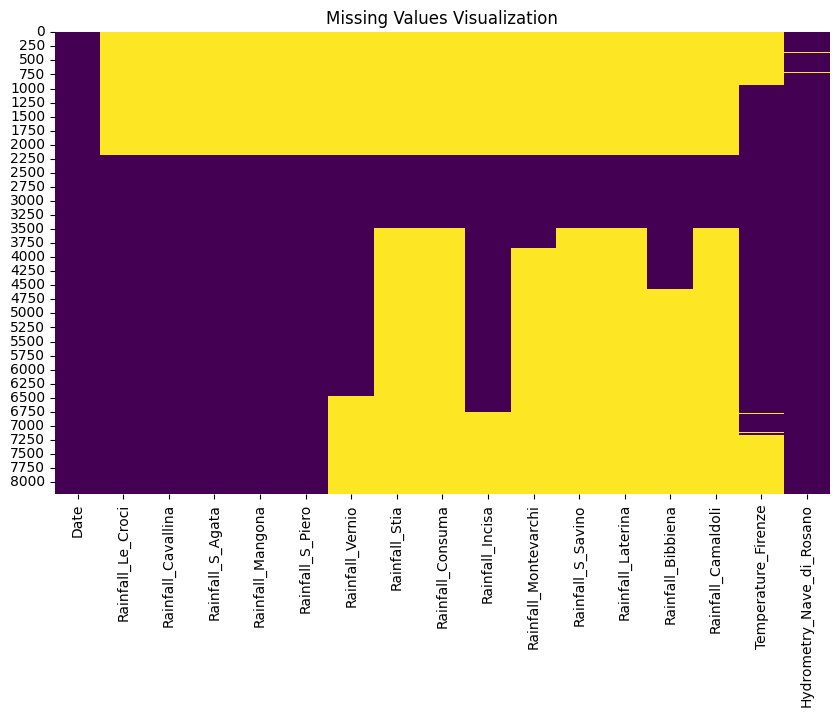

In [22]:
missing_counts = data.isnull().sum()
print(missing_counts)

# 缺失值可视化
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

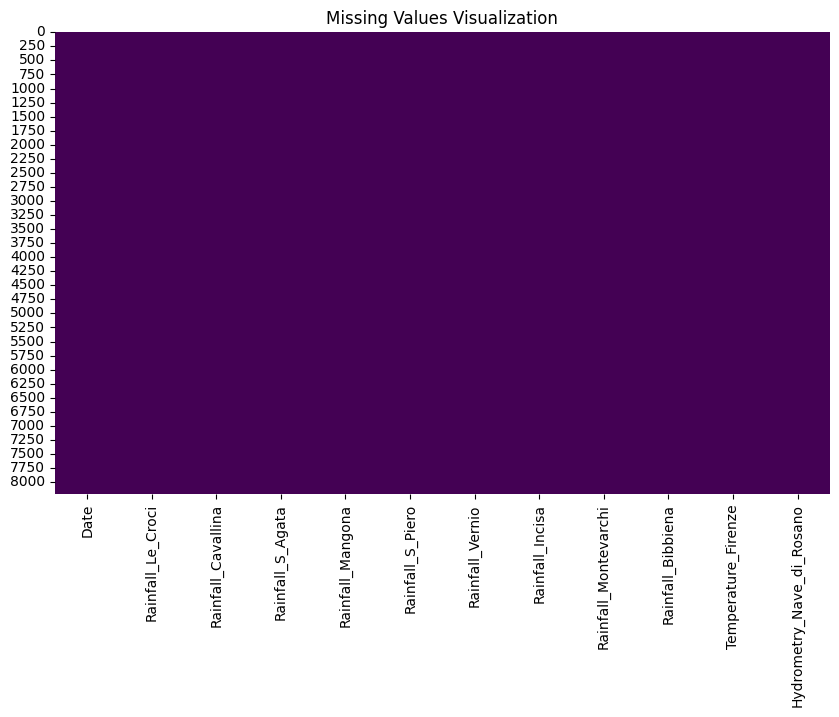

Date                         0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Rainfall_Incisa              0
Rainfall_Montevarchi         0
Rainfall_Bibbiena            0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64

In [23]:
import pandas as pd
from sklearn.impute import KNNImputer

missing_percentage = data.isnull().sum() / len(data)
cols_to_drop = missing_percentage[missing_percentage > 0.8].index
data_cleaned = data.drop(columns=cols_to_drop)

# 从数据集中分离出日期列
date_col = data_cleaned['Date']
data_no_date = data_cleaned.drop(columns=['Date'])

# 使用KNN填充法对数值列的缺失值进行填充
imputer = KNNImputer(n_neighbors=5)
data_filled = imputer.fit_transform(data_no_date)

# 将填充后的数据转换回DataFrame
data_filled_df = pd.DataFrame(data_filled, columns=data_no_date.columns)

# 将日期列添加回填充后的数据
data_filled_df['Date'] = date_col

# 重新排列列，以保持 'Date' 在最前面
data_filled_df = data_filled_df[data_cleaned.columns]
data_cleaned=data_filled_df

plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

# 检查缺失值处理后的数据
data_cleaned.isnull().sum()


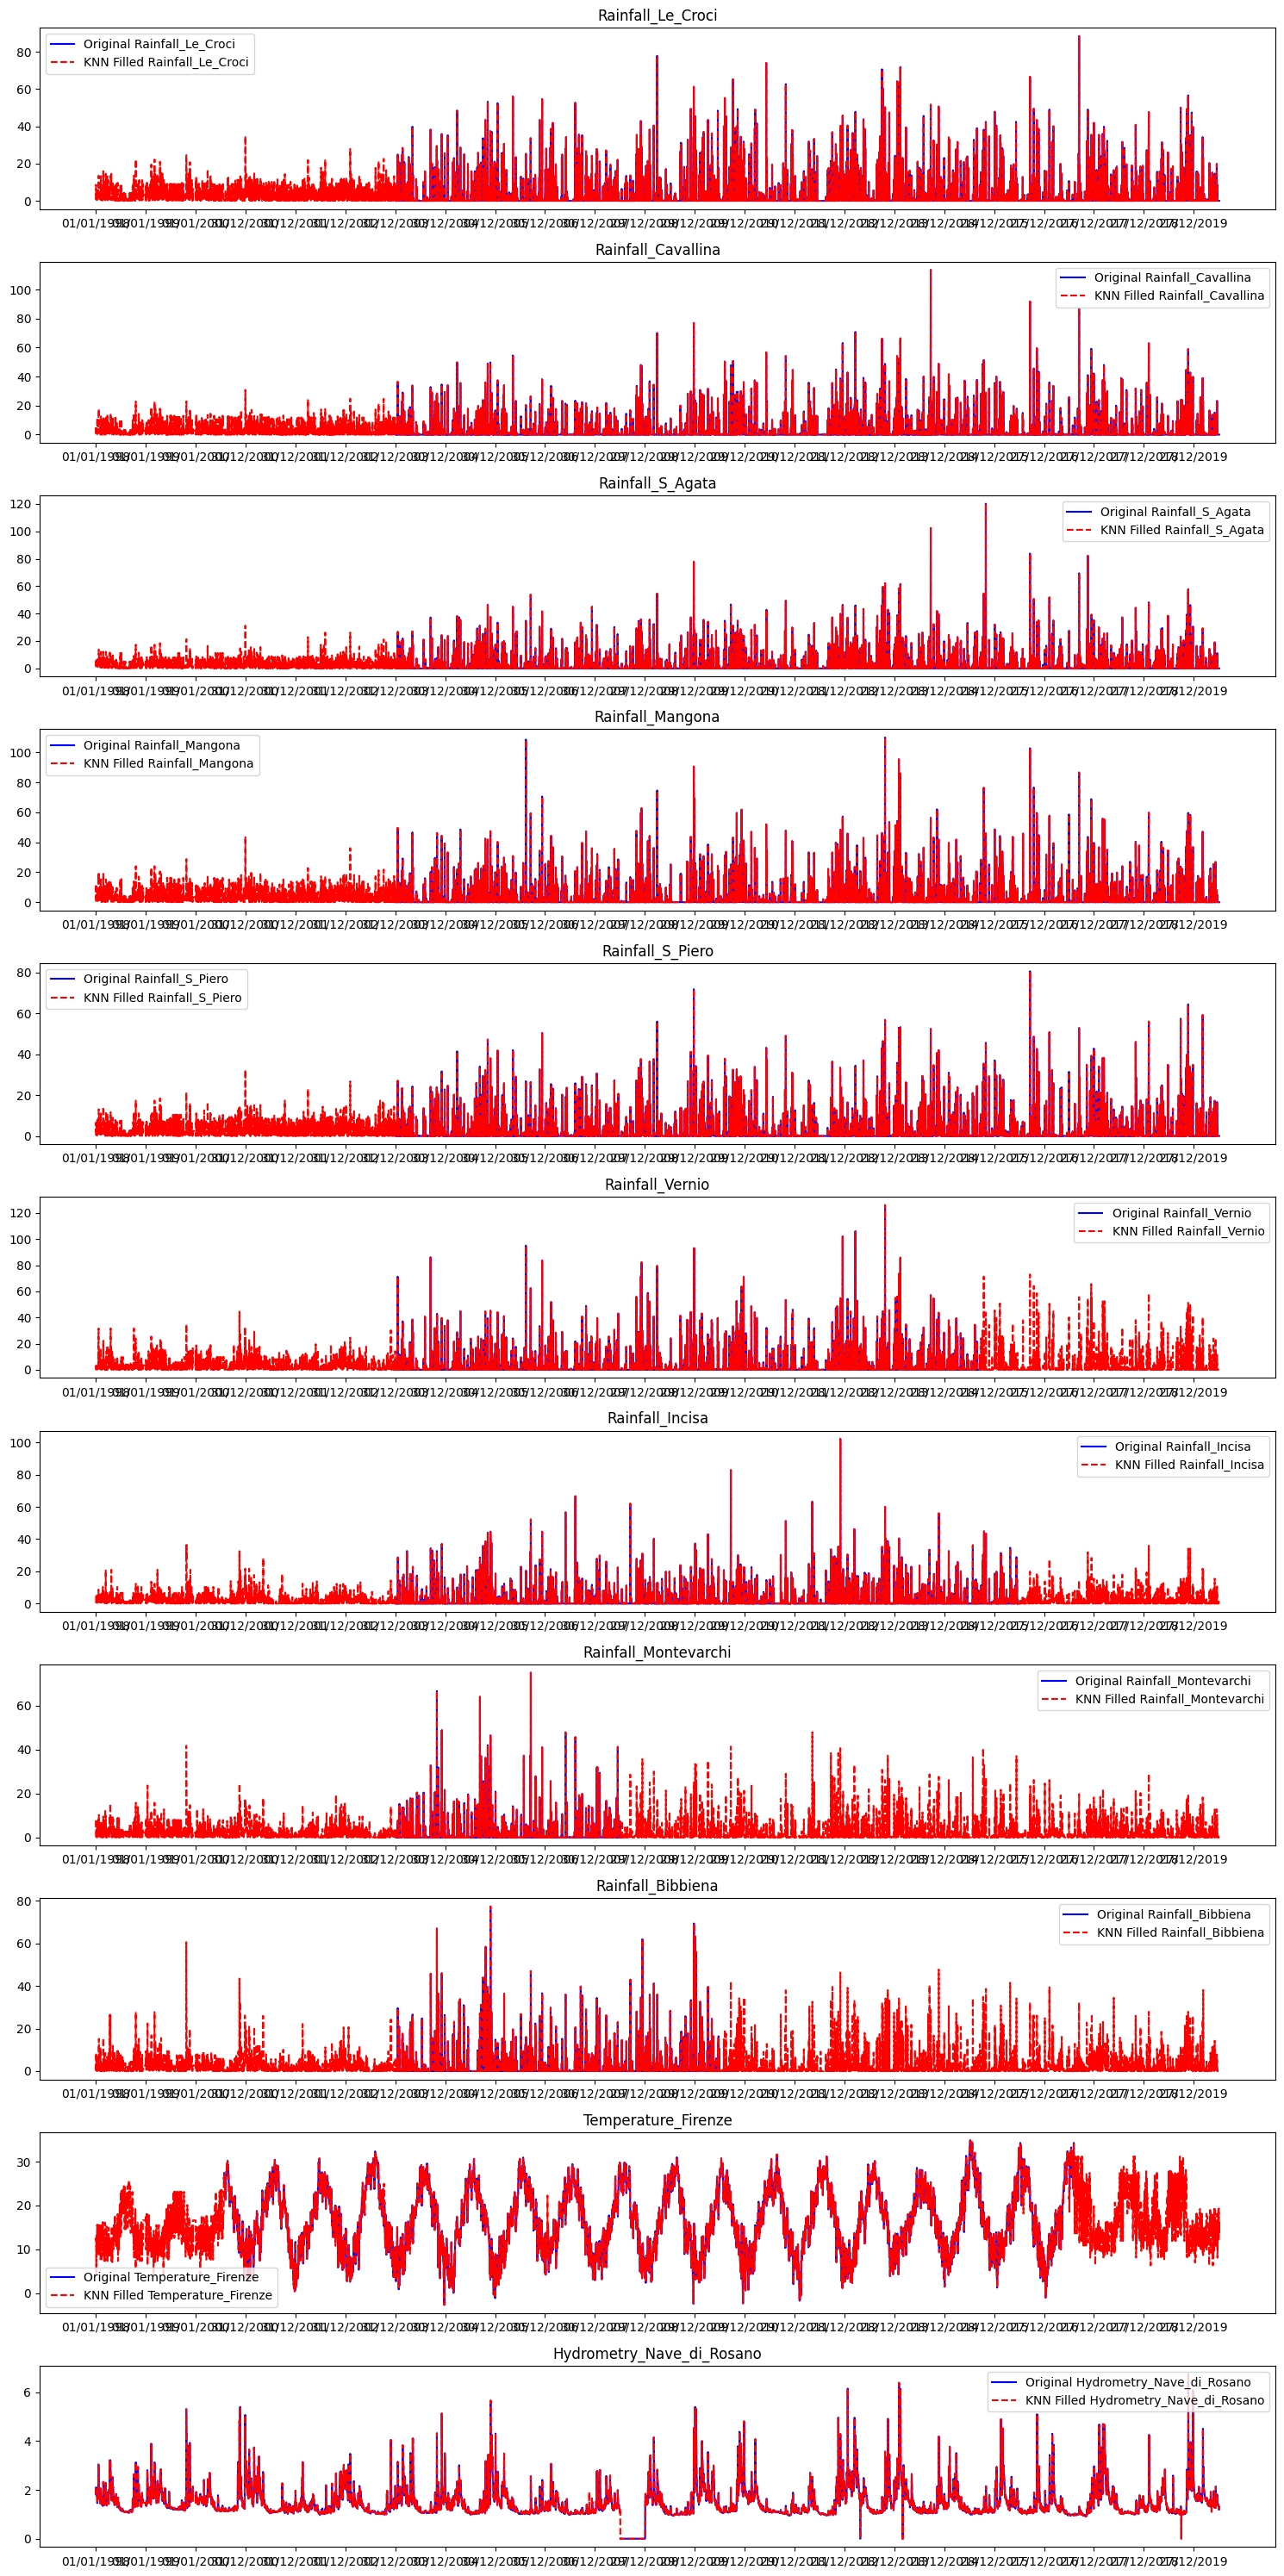

In [24]:
import matplotlib.pyplot as plt

columns_to_visualize = [
    "Rainfall_Le_Croci", "Rainfall_Cavallina", "Rainfall_S_Agata", 
    "Rainfall_Mangona", "Rainfall_S_Piero", "Rainfall_Vernio", 
    "Rainfall_Incisa", "Rainfall_Montevarchi", "Rainfall_Bibbiena", 
    "Temperature_Firenze", "Hydrometry_Nave_di_Rosano"
]

# Initialize the subplot
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(15, 30))

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_visualize):
    original_data = data[column]
    filled_data = data_filled_df[column]
    axes[i].plot(data['Date'], original_data, label=f'Original {column}', color='blue')
    axes[i].plot(data_filled_df['Date'], filled_data, label=f'KNN Filled {column}', color='red', linestyle='dashed')
    axes[i].set_title(column)
    axes[i].legend()
    axes[i].set_xticks(data['Date'][::365])  # Displaying one tick per year for clarity

# Adjust the layout
plt.tight_layout()
plt.show()



In [25]:
# 将日期转换为datetime格式
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], dayfirst=True)

# 提取年、月和日作为新的特征
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day

# 删除原始的Date列
data_cleaned.drop(columns=['Date'], inplace=True)

data_cleaned.head()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_Bibbiena,Temperature_Firenze,Hydrometry_Nave_di_Rosano,Year,Month,Day
0,0.68,0.48,0.96,0.40,0.20,0.76,0.44,0.44,0.08,12.06,1.82,1998,1,1
1,8.60,5.92,5.36,12.12,6.52,0.28,1.32,0.32,0.96,12.61,1.94,1998,1,2
2,4.96,3.72,3.52,2.68,3.04,3.32,3.16,8.28,8.60,12.50,2.11,1998,1,3
3,5.08,2.68,5.32,3.24,2.24,0.24,5.76,5.28,0.00,4.22,1.84,1998,1,4
4,0.60,0.80,0.60,2.84,3.44,2.12,2.76,0.56,3.80,12.59,1.88,1998,1,5


In [26]:
# 获取描述性统计信息
data_cleaned.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_Bibbiena,Temperature_Firenze,Hydrometry_Nave_di_Rosano,Year,Month,Day
count,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000
mean,3.282366,2.866049,2.765592,3.550314,2.662627,3.491306,2.329998,2.117288,2.611883,16.370407,1.472375,2008.754412,6.456249,15.727638
std,7.165960,6.898258,6.379242,7.992056,5.983026,8.274010,5.294925,4.638228,5.729036,6.971488,0.614501,6.497944,3.448722,8.799567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.000000,1998.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.150000,1.100000,2003.000000,3.000000,8.000000
50%,0.200000,0.000000,0.200000,0.120000,0.200000,0.120000,0.160000,0.200000,0.280000,15.600000,1.310000,2009.000000,6.000000,16.000000
75%,3.360000,2.400000,2.670063,3.400000,2.480000,3.200000,2.335026,2.160000,2.640959,21.850000,1.690000,2014.000000,9.000000,23.000000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,102.200000,75.000000,77.400000,34.900000,6.750000,2020.000000,12.000000,31.000000


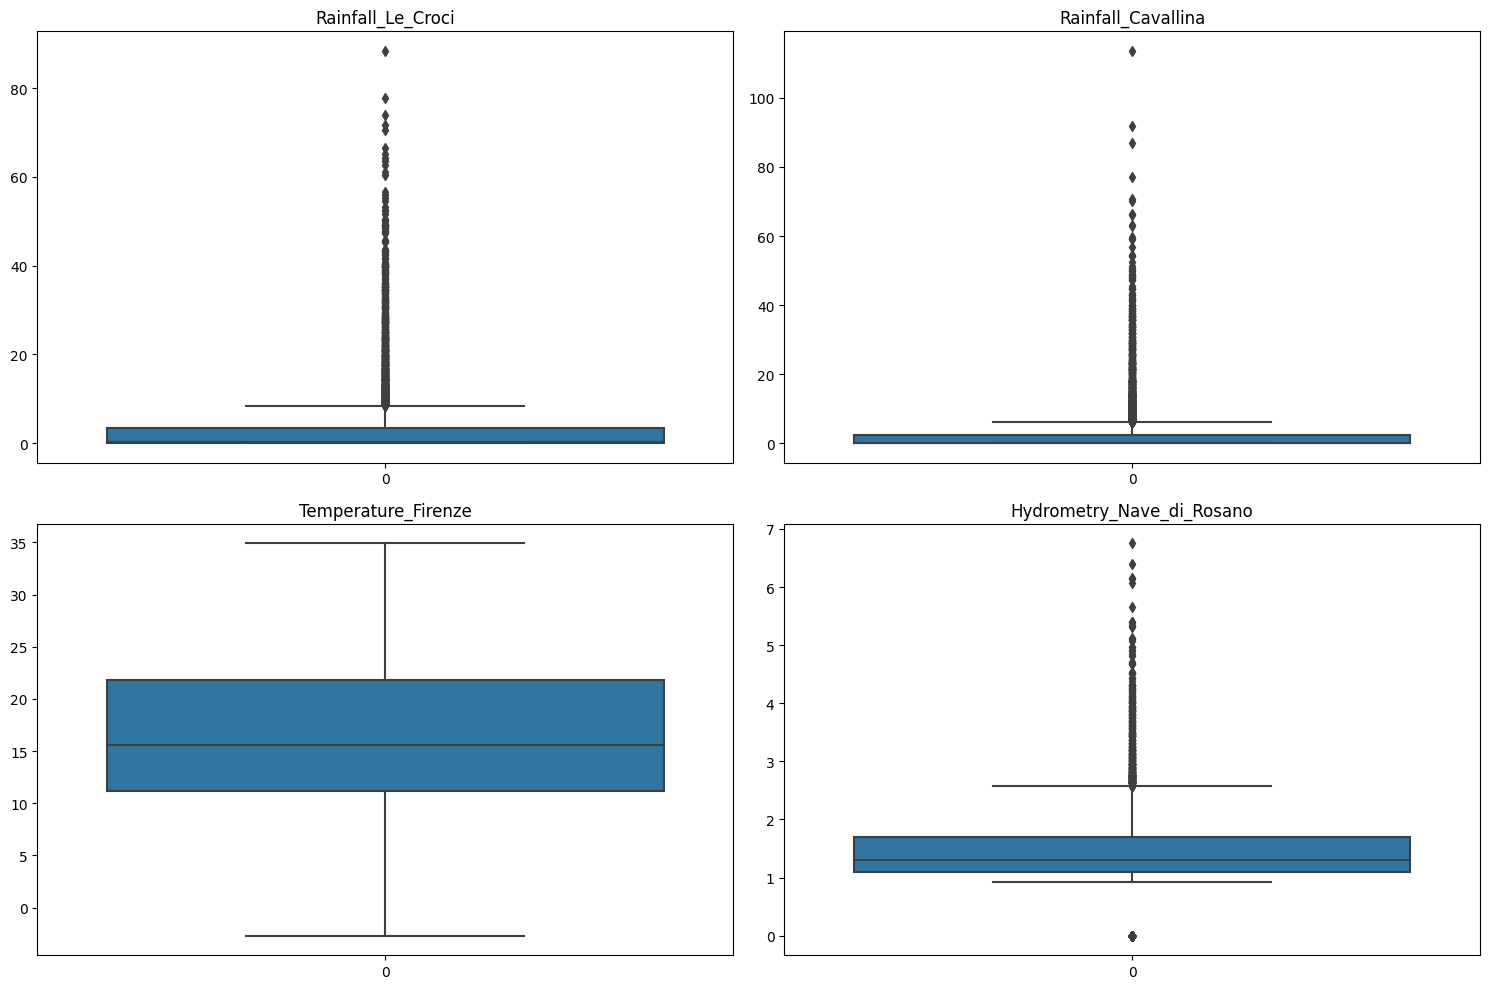

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择要绘制的特征
features_to_plot = ['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data_cleaned[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()


In [28]:
from sklearn.model_selection import train_test_split

# 分离特征和目标变量
X = data_cleaned.drop('Hydrometry_Nave_di_Rosano', axis=1)
y = data_cleaned['Hydrometry_Nave_di_Rosano']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape


((6573, 13), (1644, 13))

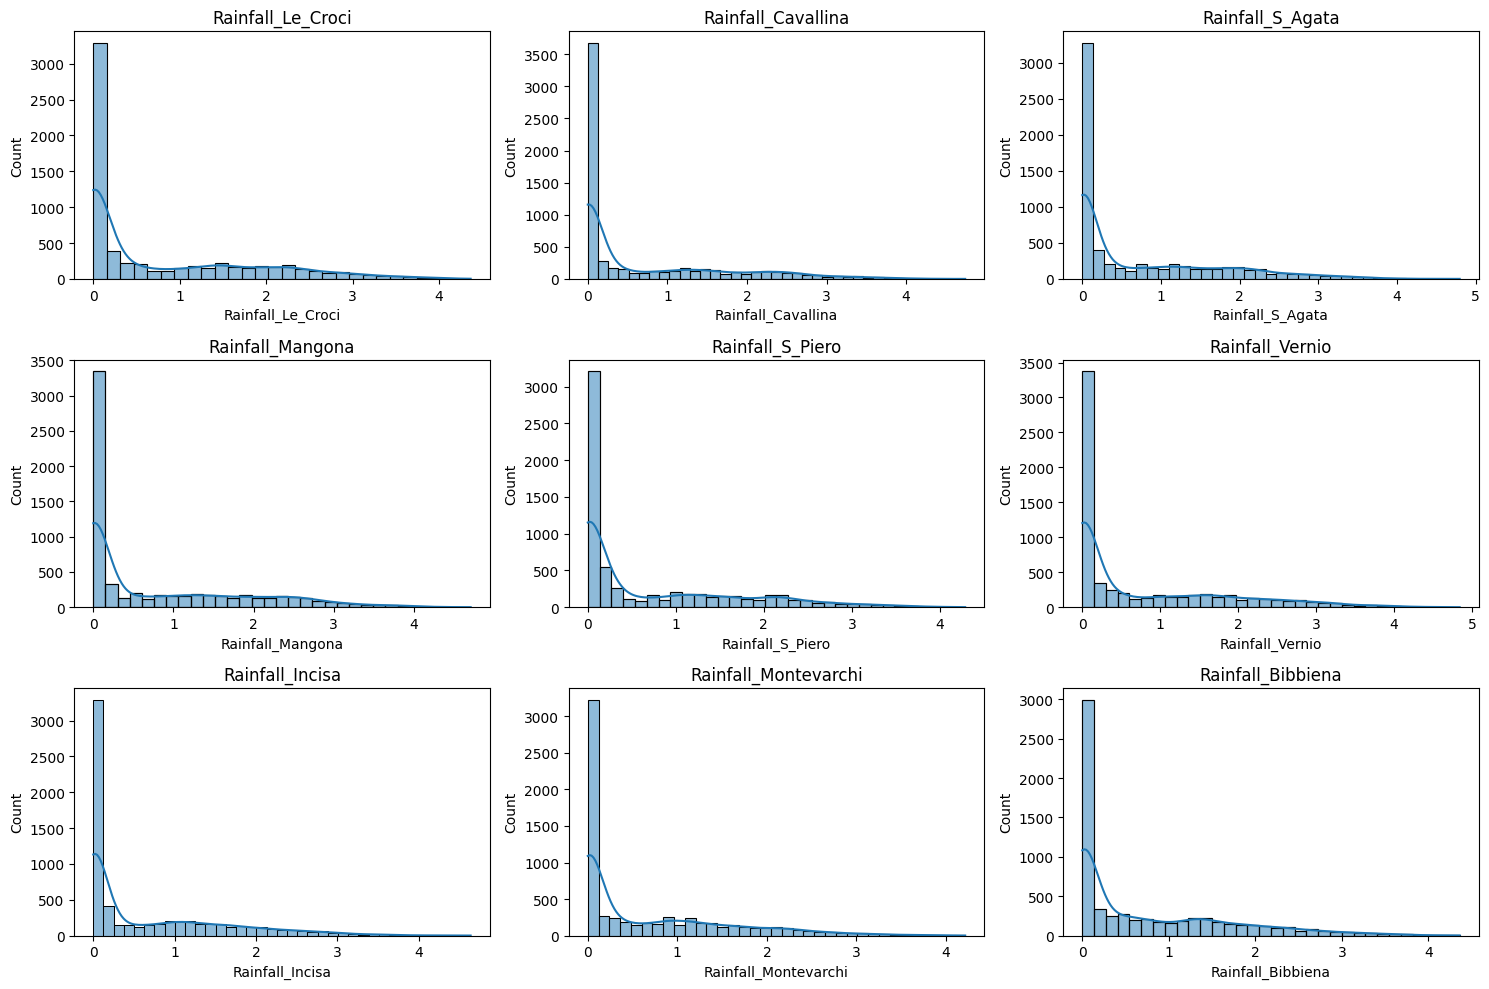

In [29]:
import numpy as np

rainfall_features = [col for col in X_train.columns if 'Rainfall' in col]

# 对训练集的降雨特征进行对数转换
X_train_log = X_train.copy()
X_train_log[rainfall_features] = np.log1p(X_train_log[rainfall_features])

# 绘制转换后的降雨特征的分布
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rainfall_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train_log[feature], kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 划分训练和测试集
X = data_cleaned.drop('Hydrometry_Nave_di_Rosano', axis=1)
y = data_cleaned['Hydrometry_Nave_di_Rosano']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 对雨量特征进行对数转换
rainfall_features = [col for col in X_train.columns if 'Rainfall' in col]
X_train[rainfall_features] = np.log1p(X_train[rainfall_features])
X_test[rainfall_features] = np.log1p(X_test[rainfall_features])

# 2. 使用XGBoost进行训练和预测
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}")

XGBoost - MAE: 0.2099331906717892, RMSE: 0.357712125138828


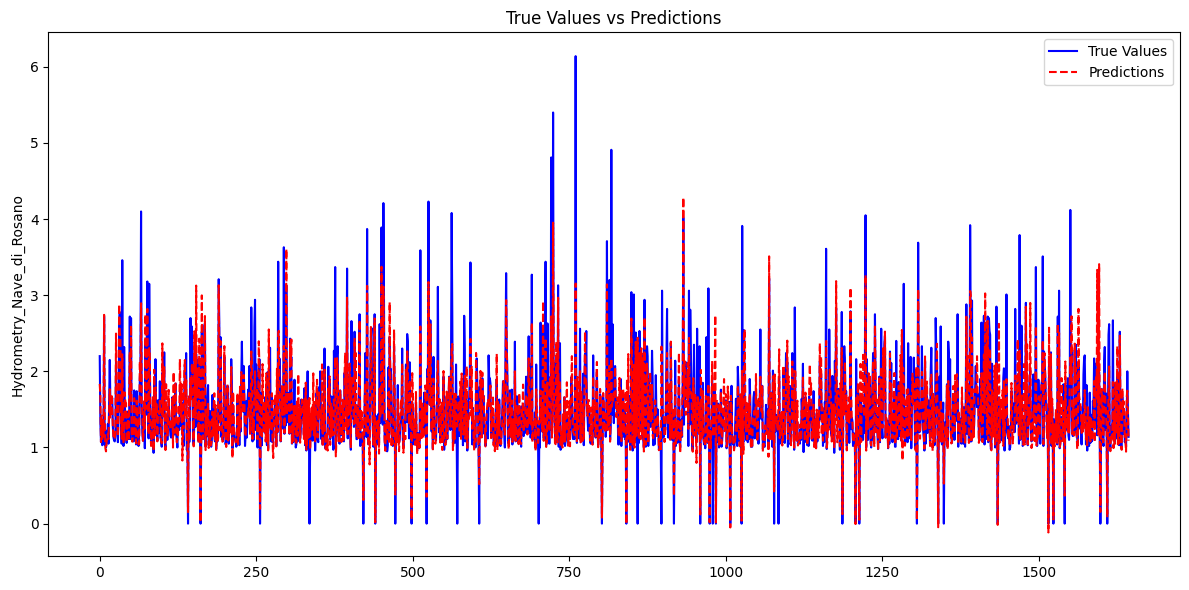

In [31]:
# 可视化真实值与预测值的对比
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(y_pred_xgb, label='Predictions', color='red', linestyle='dashed')
plt.title('True Values vs Predictions')
plt.legend()
plt.ylabel('Hydrometry_Nave_di_Rosano')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def create_dataset(data, look_back=1):
    """
    Convert time series data into suitable format for LSTM.
    """
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :-1]  # Excludes target variable
        X.append(a)
        Y.append(data[i + look_back, -1])  # Only target variable
    return np.array(X), np.array(Y)

# Features and target variable
features = data_cleaned.drop(columns=['Hydrometry_Nave_di_Rosano'])
target = data_cleaned['Hydrometry_Nave_di_Rosano']

# Combine features and target for easier transformation
combined_data = pd.concat([features, target], axis=1)

# Scale data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_data)

# Create dataset for LSTM
look_back = 7
X, Y = create_dataset(scaled_data, look_back)


# Split data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


c:\Users\zhouxiinlei\Anaconda3\envs\pytorch1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 100/300, Loss: 0.0003026154590770602
Epoch 200/300, Loss: 0.0002739308984018862
Epoch 300/300, Loss: 0.00013559131184592843
Test Loss (MSE): 0.0041
MAE: 0.0424
RMSE: 0.0637


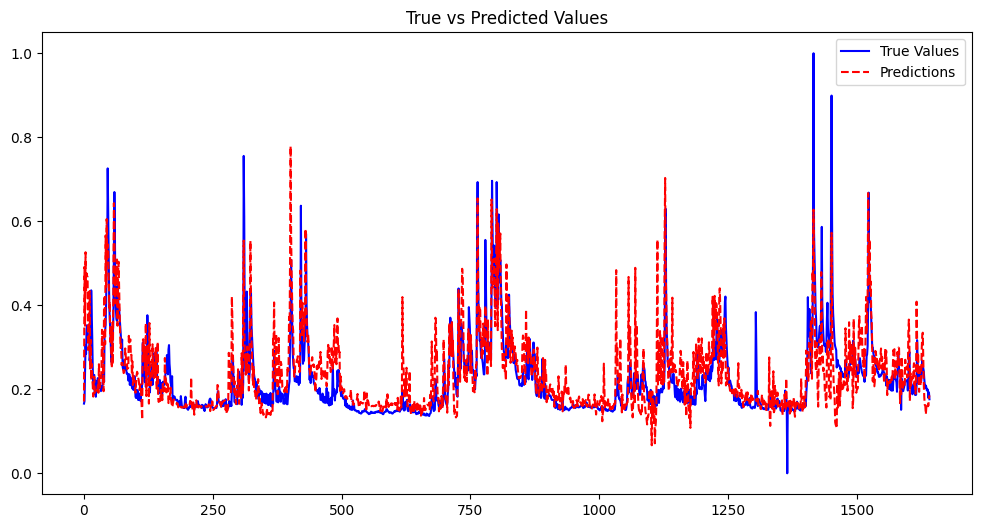

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 1. Define Dataset
class TimeSeriesDataset(Dataset):
    """Time series dataset for PyTorch."""
    
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Convert data into PyTorch datasets and data loaders
batch_size = 64

train_dataset = TimeSeriesDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TimeSeriesDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2. Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        
        # Define the output layer
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch 
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
        # Index hidden state of last time step
        out = self.linear(out[:, -1, :])
        return out

input_dim = X_train.shape[2]
hidden_dim = 50
num_layers = 1
output_dim = 1

model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)

# 3. Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. Train the model
num_epochs = 300
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# 5. Evaluate on test data (you can also add your evaluation metrics here)
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
    test_loss = criterion(test_outputs, torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1))
    print(f'Test Loss (MSE): {test_loss.item():.4f}')

    # Calculate MAE and RMSE
    mae = torch.mean(torch.abs(test_outputs - torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)))
    rmse = torch.sqrt(test_loss)
    
print(f'MAE: {mae.item():.4f}')
print(f'RMSE: {rmse.item():.4f}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='True Values', color='blue')
plt.plot(test_outputs.numpy(), label='Predictions', color='red', linestyle='dashed')
plt.legend()
plt.title('True vs Predicted Values')
plt.show()